In [18]:
tickers = ["AMZN", "TSLA", "BABA", "HD", "TM", "NKE", "MCD", "LOW", "SBUX", "JD", "PDD", "BKNG", "GM", "MELI", "TJX", "NIO", "F", "LULU", "HMC", "CMG"]

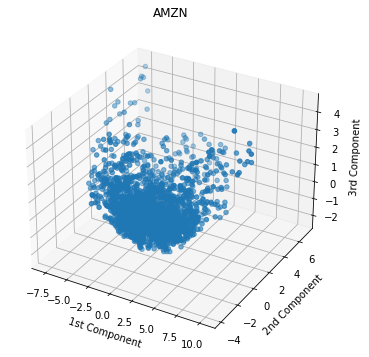

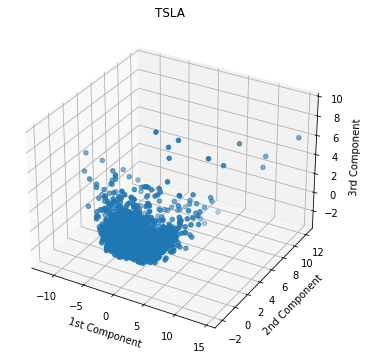

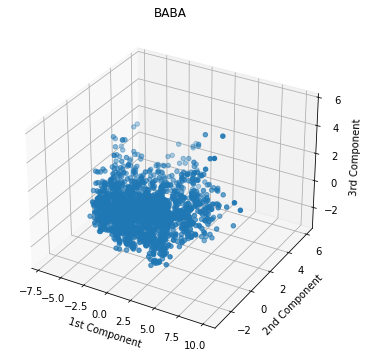

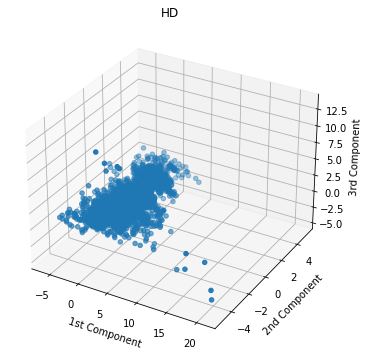

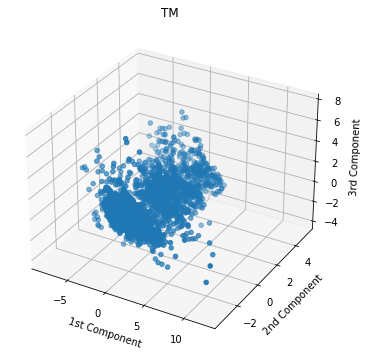

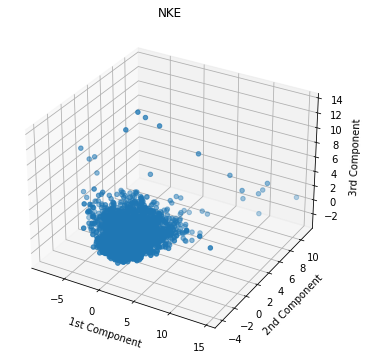

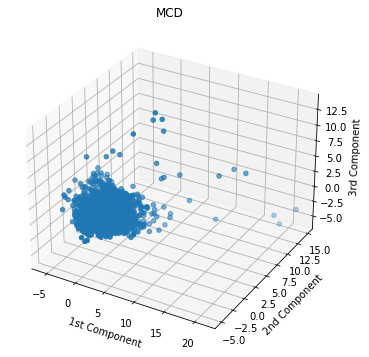

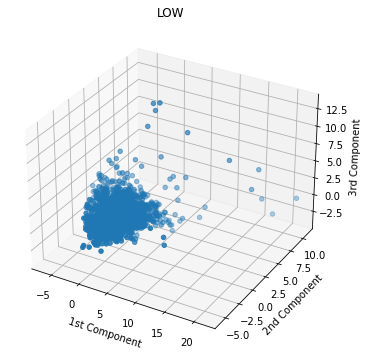

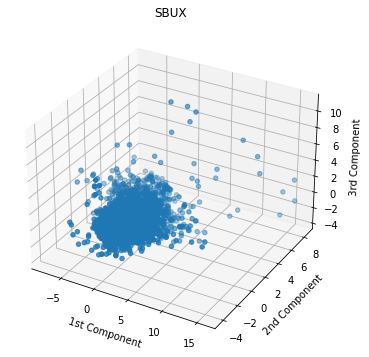

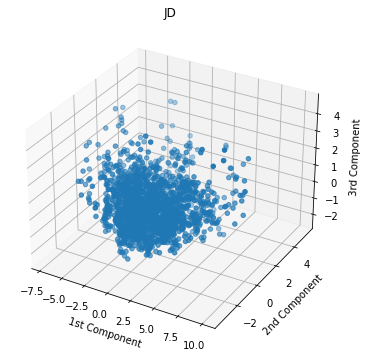

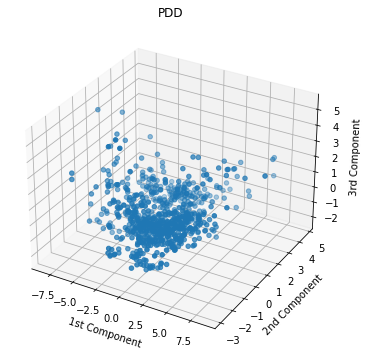

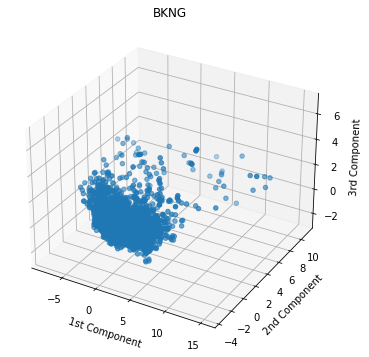

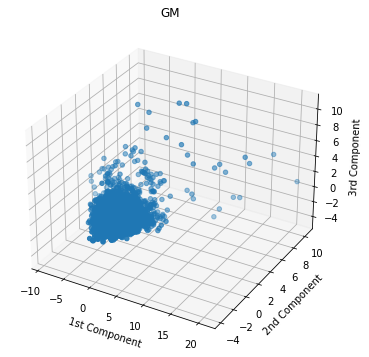

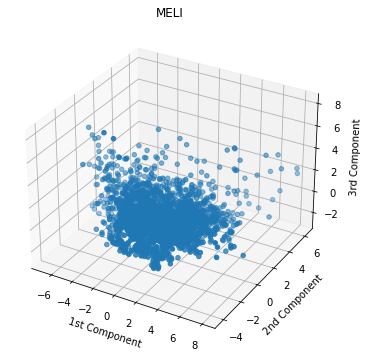

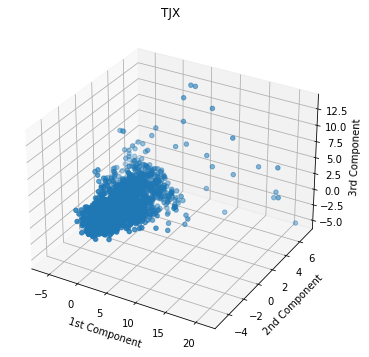

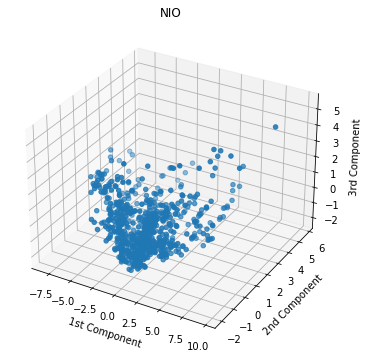

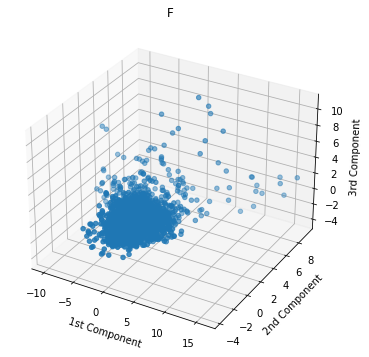

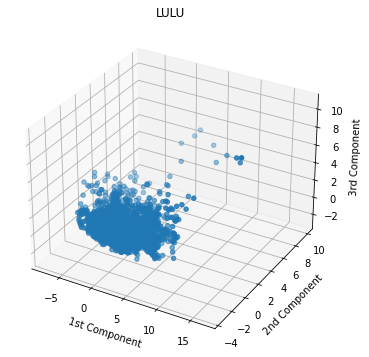

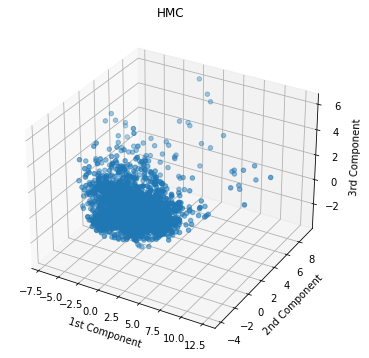

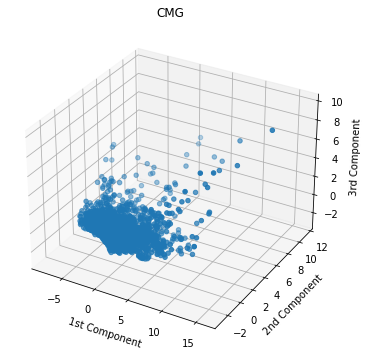

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

for ticker in tickers:
    # read in data from csv
    data = pd.read_csv(f'./data/{ticker}.csv')

    # generate matrix with technical indicators (features) as columns
    features = data.to_numpy()[:, 6:]

    # normalize each feature
    scaler = StandardScaler()
    X = scaler.fit_transform(features)

    # project the data along the first 3 principal components
    pca = PCA(n_components=3)
    X_proj = pca.fit_transform(X)

    # plot the transformed data
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2])
    ax.set_xlabel("1st Component")
    ax.set_ylabel("2nd Component")
    ax.set_zlabel("3rd Component")
    plt.title(ticker)

    fig.set_size_inches(6, 6)
    if not os.path.exists("figs"):
            os.mkdir("figs")
    plt.savefig('./figs/' + ticker + '_pca.png', dpi=200)